## Virus SEIR

Simulación de propagación de un virus bajo el modelo **SEIR**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

def DiffEqs(y, t):    
    # Recuperamos las variables dependientes de entrada
    S, E, I, R, D = y    
    Nn = S + E + I + R # Total de personas vivas
    
    #--------------------------
    # Parámetros del modelo
    #---------------------------

    sigma = 1./9   # Velocidad de convertirse en contagioso una vez expuesto
    gamma = 1./8.5 # Velocidad de recuperación o fallecimiento
    f = 0.4        # Fracción de gente que no supera la enfermedad (40%)
    R_0 = 2        # Número de personas contagiadas por infectado

    beta = R_0*gamma # Velocidad con la que se propaga la infección

    # Definimos las ecuaciones diferenciales
    
    dSdt = -beta*(S/Nn)*I
    dEdt = +beta*(S/Nn)*I - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = (1.0 - f)*gamma*I
    dDdt = f*gamma*I
    
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

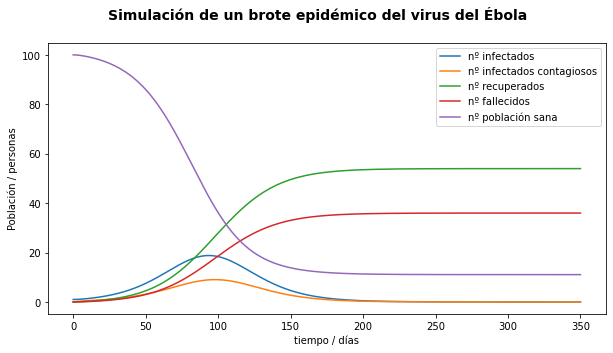

In [2]:
tiempo_simulacion = 350 # días
t = np.linspace(0., tiempo_simulacion, 1000)

# Condiciones iniciales
N = 100 # Población total
y0 = [N, 1, 0, 0, 0] # [S, E, I, R, D]

# Llamamos al ode para resolver las eq. diferenciales   
solution = integrate.odeint(DiffEqs, y0, t)

S = solution[:,0] #  S es el nº de personas sin infectar
E = solution[:,1] #  E es el nº de portadores del virus no contagiosos (aún)
I = solution[:,2] #  I es el nº de personas sintomáticas e infecciosas
R = solution[:,3] #  R es el nº de personas recuperadas
Ds = solution[:,4] #  D es el nº de personas fallecidas

# Creamos la figura para representar los resultados
fig = plt.figure(figsize=(10, 5))

# Representamos las curvas de evolución con respecto al tiempo
plt.plot(t, (E + I))
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, Ds)
plt.plot(t, S)

# Añadimos leyenda a los datos
plt.legend(
    [
        "nº infectados",
        "nº infectados contagiosos", 
        "nº recuperados", 
        "nº fallecidos",
        "nº población sana"
    ],
    loc=1
)

plt.suptitle(
    "Simulación de un brote epidémico del virus del Ébola",
    fontsize=14,
    fontweight='bold'
)

plt.xlabel("tiempo / días")
plt.ylabel("Población / personas")

plt.show()